## First Passage Probabilities in an Absorbing Markov Chain

In [2]:
import numpy as np
import pandas as pd

# Define the full transition matrix P with state labels
states = ["A", "B", "C", "D", "E"]
P = pd.DataFrame([
    [1,    0,    0,    0,    0],
    [0,    1,    0,    0,    0],
    [4/9,  1/9,  1/9,  1/9,  2/9],
    [3/7,  1/7,  1/7,  0,    2/7],
    [3/8,  1/8,  1/8,  2/8,  1/8]
], columns=states, index=states)

print("Transition Matrix P:")
print(P)

# Define transient and absorbing states
absorbing = ["A", "B"]
transient = ["C", "D", "E"]

# Extract submatrices Q and R from P
Q = P.loc[transient, transient].to_numpy()
R = P.loc[transient, absorbing].to_numpy()

# Identity matrix for the size of Q
I = np.eye(Q.shape[0])

# Fundamental matrix N = (I - Q)^(-1)
N = np.linalg.inv(I - Q)

# First passage probability matrix F = N @ R
F = N @ R

# Format results as DataFrames
Q_df = pd.DataFrame(Q, index=transient, columns=transient)
R_df = pd.DataFrame(R, index=transient, columns=absorbing)
N_df = pd.DataFrame(N, index=transient, columns=transient)
F_df = pd.DataFrame(F, index=transient, columns=absorbing)

# Display matrices
print("\nMatrix Q (Transient to Transient):")
print(Q_df)

print("\nMatrix R (Transient to Absorbing):")
print(R_df)

print("\nFundamental Matrix N = (I - Q)^(-1):")
print(N_df)

print("\nFirst Passage Probability Matrix F = N @ R:")
print(F_df)

Transition Matrix P:
          A         B         C         D         E
A  1.000000  0.000000  0.000000  0.000000  0.000000
B  0.000000  1.000000  0.000000  0.000000  0.000000
C  0.444444  0.111111  0.111111  0.111111  0.222222
D  0.428571  0.142857  0.142857  0.000000  0.285714
E  0.375000  0.125000  0.125000  0.250000  0.125000

Matrix Q (Transient to Transient):
          C         D         E
C  0.111111  0.111111  0.222222
D  0.142857  0.000000  0.285714
E  0.125000  0.250000  0.125000

Matrix R (Transient to Absorbing):
          A         B
C  0.444444  0.111111
D  0.428571  0.142857
E  0.375000  0.125000

Fundamental Matrix N = (I - Q)^(-1):
          C         D         E
C  1.216216  0.231231  0.384384
D  0.243243  1.135135  0.432432
E  0.243243  0.357357  1.321321

First Passage Probability Matrix F = N @ R:
          A         B
C  0.783784  0.216216
D  0.756757  0.243243
E  0.756757  0.243243


## Graph Visualization

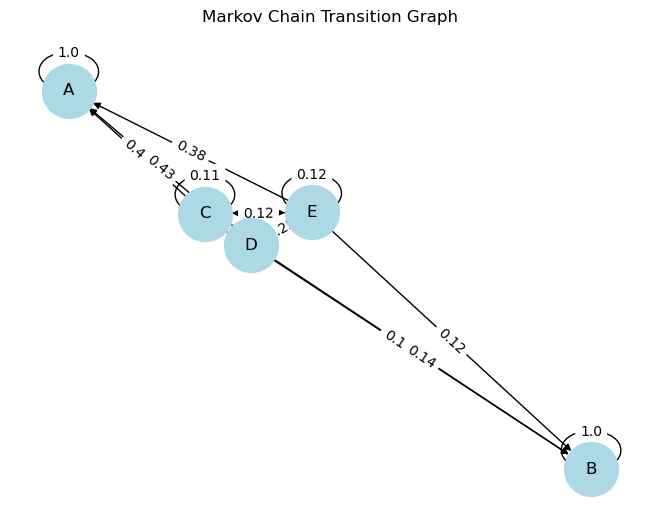

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add edges with weights
for i in states:
    for j in states:
        prob = P.loc[i, j]
        if prob > 0:
            G.add_edge(i, j, weight=round(prob, 2))

# Define layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Markov Chain Transition Graph")
plt.show()
